<a href="https://colab.research.google.com/github/dmarx/notebooks/blob/karlo/DtD_Karlo_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
# @title Setup

########################
# install dependencies #
########################

!pip install diffusers["torch"] transformers ftfy accelerate

##############
# load model #
##############

import torch
from diffusers import UnCLIPPipeline

pipe = UnCLIPPipeline.from_pretrained("kakaobrain/karlo-v1-alpha", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

##########################
# setup helper functions #
##########################

def run(prompt):
    images = pipe(prompt, num_images_per_prompt=6).images
    return images


In [3]:
# @title Generate images

images = run("a photo of a delicious cheeseburger")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

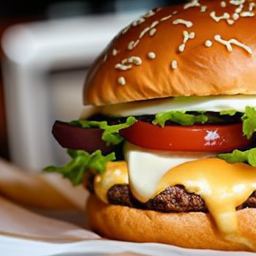

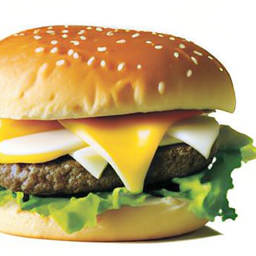

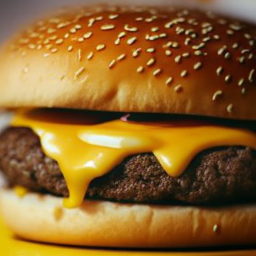

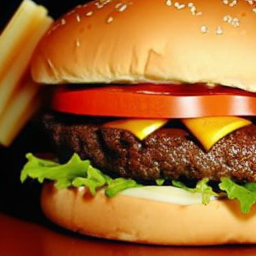

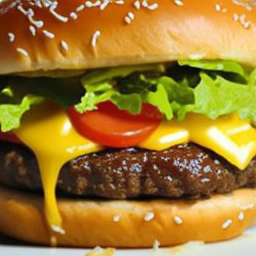

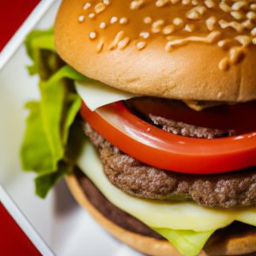

In [4]:
for im in images:
  display(im)

In [5]:
dir(pipe)

['__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_deprecated_kwargs',
 '_dict_from_json_file',
 '_encode_prompt',
 '_execution_device',
 '_get_init_keys',
 '_get_signature_keys',
 '_internal_dict',
 '_optional_components',
 '_progress_bar_config',
 'components',
 'config',
 'config_name',
 'decoder',
 'decoder_scheduler',
 'device',
 'disable_attention_slicing',
 'disable_xformers_memory_efficient_attention',
 'enable_attention_slicing',
 'enable_sequential_cpu_offload',
 'enable_xformers_memory_efficient_attention',
 'extract_init_dict',
 'from_config',
 'from_pretrained',
 'get_config_dict',
 'has_compatibles',
 'ignore_for_config',
 